In [3]:
import networkx as nx
import EoN
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("default")
from Functions import *
%run -i "Functions.py"

In [4]:
female, male, time = np.loadtxt("network_rocha-etal.csv", unpack=True, comments="#", dtype=np.int16)
number_of_nodes = len(np.unique(male)) + len(np.unique(female))
"""dim = max(female.max(), male.max())+1
adj = np.zeros((dim,dim))
for i,j in zip(female,male):
    adj[i,j] = 1
    adj[j,i] = 1
net = nx.from_numpy_array(adj)"""

'dim = max(female.max(), male.max())+1\nadj = np.zeros((dim,dim))\nfor i,j in zip(female,male):\n    adj[i,j] = 1\n    adj[j,i] = 1\nnet = nx.from_numpy_array(adj)'

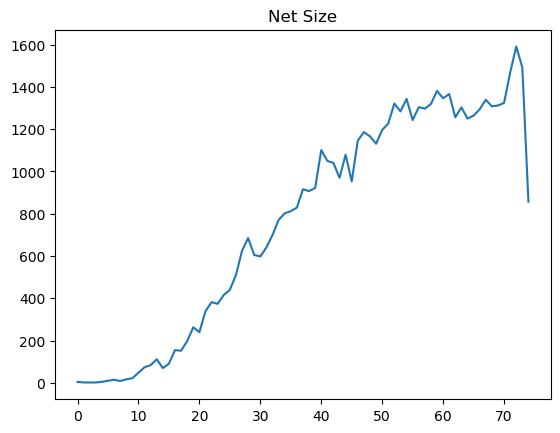

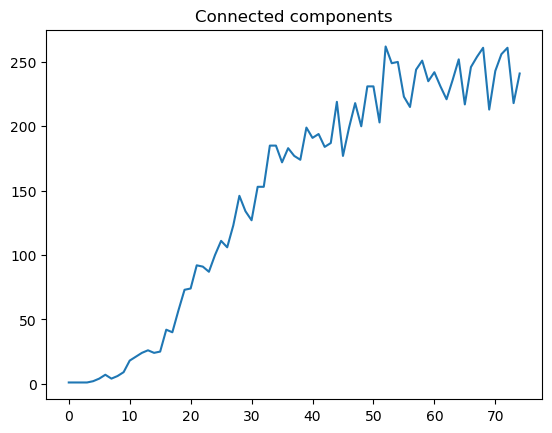

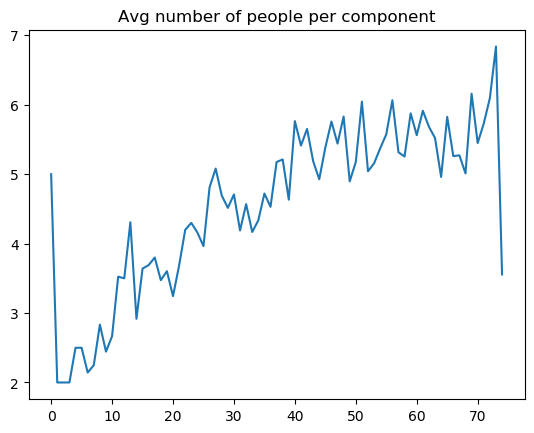

In [5]:
net_list, agg = temporal_network_list(female, male, time, 30)
net_size=[]
connected_comp = []

for net in net_list:
    net_size.append(len(list(net.nodes)))
    connected_comp.append(nx.number_connected_components(net))


plt.plot(net_size)
plt.title("Net Size")
plt.show()

plt.plot(connected_comp)
plt.title("Connected components")
plt.show()

plt.plot(np.divide(net_size, connected_comp))
plt.title("Avg number of people per component")
plt.show()

In [6]:
# %% disease parameters
params = [0.1, 0.01, 1e-03, 1e-04]
tmax = 10000 # days
aggregation = 30 # days
rho = 1
t_initial_seed = 20
p_infected = 1e-03
excl_fraction = 5/7

net_list, agg = temporal_network_list(female, male, time, aggregation)

In [7]:
results = []
for beta in params:
    for mu in params:
        print("\nbeta = {:.4f} | mu = {:.4f}".format(beta, mu))
        S, I, R, T = SIR_temporal(net_list, agg, tmax=tmax, beta=beta, mu=mu, rho=rho, p_infected=p_infected, t_initial_seed=t_initial_seed, exclude_fraction=excl_fraction)
        results.append([beta, mu, T, S, I, R])

beta = [row[0] for row in results]
mu   = [row[1] for row in results] 
time = [row[2] for row in results]
S    = [row[3] for row in results]
I    = [row[4] for row in results]
R    = [row[5] for row in results]

np.save("SIR_temporal", [mu, beta, T, S, I, R])


  0%|          | 0/10000 [00:00<?, ?it/s]


beta = 0.1000 | mu = 0.1000

beta = 0.1000 | mu = 0.0100


  0%|          | 41/10000 [00:00<00:24, 399.93it/s]


beta = 0.1000 | mu = 0.0010


  0%|          | 44/10000 [00:00<00:22, 438.60it/s]


beta = 0.1000 | mu = 0.0001


  0%|          | 0/10000 [00:00<?, ?it/s]


beta = 0.0100 | mu = 0.1000

beta = 0.0100 | mu = 0.0100


  0%|          | 44/10000 [00:00<00:22, 437.41it/s]


beta = 0.0100 | mu = 0.0010


  0%|          | 41/10000 [00:00<00:24, 406.56it/s]


beta = 0.0100 | mu = 0.0001


  0%|          | 0/10000 [00:00<?, ?it/s]


beta = 0.0010 | mu = 0.1000

beta = 0.0010 | mu = 0.0100


  0%|          | 43/10000 [00:00<00:23, 426.29it/s]


beta = 0.0010 | mu = 0.0010


  0%|          | 43/10000 [00:00<00:23, 428.47it/s]


beta = 0.0010 | mu = 0.0001


  0%|          | 0/10000 [00:00<?, ?it/s]


beta = 0.0001 | mu = 0.1000

beta = 0.0001 | mu = 0.0100


  0%|          | 44/10000 [00:00<00:23, 432.61it/s]


beta = 0.0001 | mu = 0.0010


  0%|          | 45/10000 [00:00<00:22, 445.12it/s]


beta = 0.0001 | mu = 0.0001


100%|██████████| 10000/10000 [00:45<00:00, 219.79it/s]


In [8]:
beta

[0.1,
 0.1,
 0.1,
 0.1,
 0.01,
 0.01,
 0.01,
 0.01,
 0.001,
 0.001,
 0.001,
 0.001,
 0.0001,
 0.0001,
 0.0001,
 0.0001]

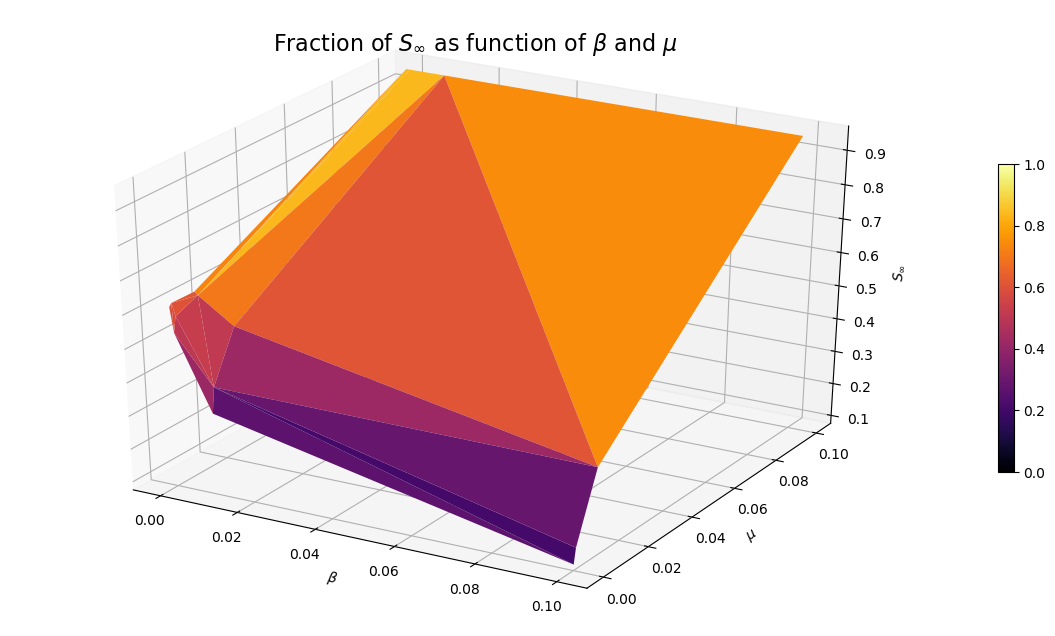

In [9]:
S_inf, R_inf = S_R_inf_surfaces(np.array(mu),np.array(beta),time,S,I,R, number_of_nodes)

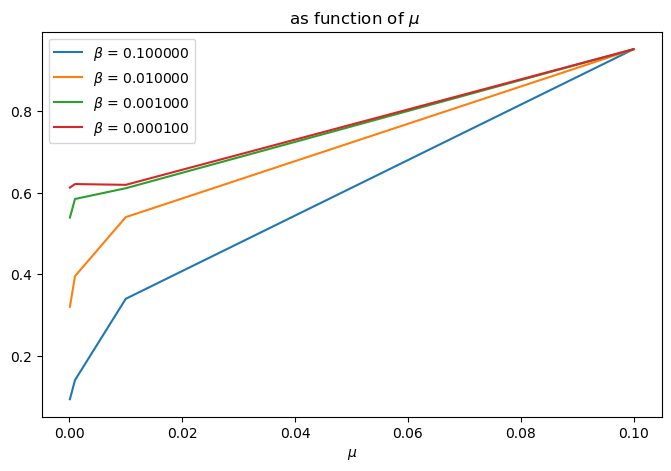

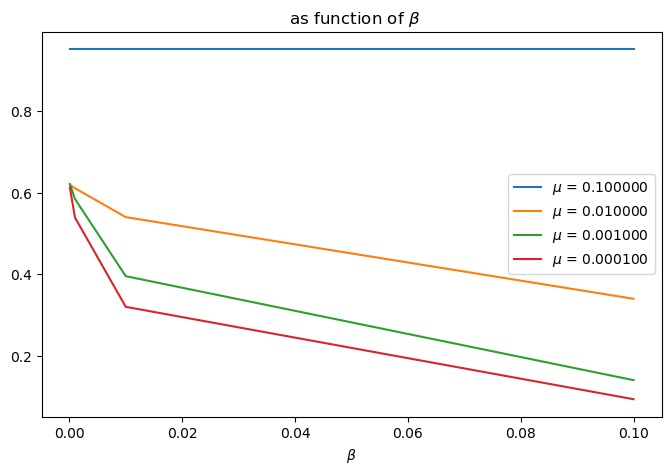

([[array([0.1   , 0.01  , 0.001 , 0.0001]),
   array([0.95182307, 0.33939032, 0.13974895, 0.0929468 ])],
  [array([0.1   , 0.01  , 0.001 , 0.0001]),
   array([0.95182307, 0.53980873, 0.39491931, 0.31966527])],
  [array([0.1   , 0.01  , 0.001 , 0.0001]),
   array([0.95182307, 0.61069934, 0.58427974, 0.53873282])],
  [array([0.1   , 0.01  , 0.001 , 0.0001]),
   array([0.95182307, 0.61900777, 0.62098027, 0.61225344])]],
 [[array([0.1   , 0.01  , 0.001 , 0.0001]),
   array([0.95182307, 0.95182307, 0.95182307, 0.95182307])],
  [array([0.1   , 0.01  , 0.001 , 0.0001]),
   array([0.33939032, 0.53980873, 0.61069934, 0.61900777])],
  [array([0.1   , 0.01  , 0.001 , 0.0001]),
   array([0.13974895, 0.39491931, 0.58427974, 0.62098027])],
  [array([0.1   , 0.01  , 0.001 , 0.0001]),
   array([0.0929468 , 0.31966527, 0.53873282, 0.61225344])]])

In [10]:
tagli(np.array(mu), np.array(beta), S_inf, number_of_nodes, params, "", "S")

beta = 0.1 | mu = 0.01


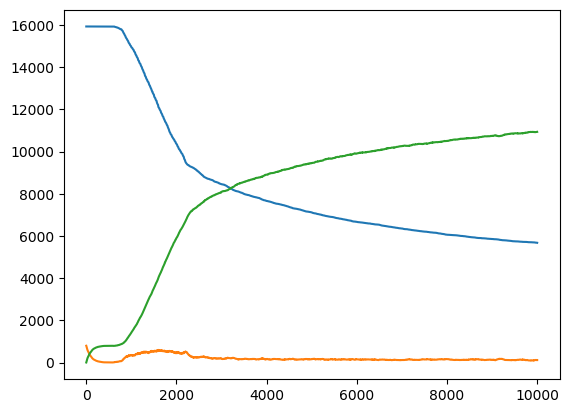

beta = 0.0001 | mu = 0.01


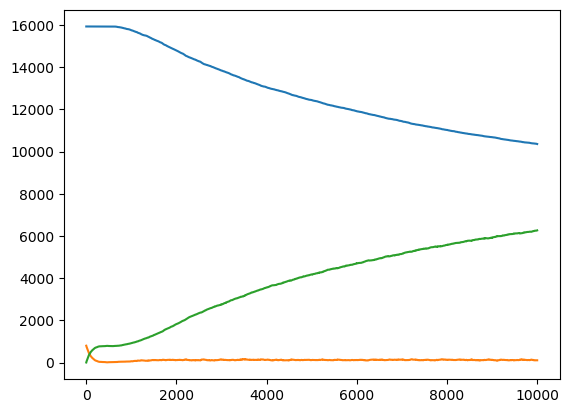

In [11]:
print("beta = {} | mu = {}".format(beta[1], mu[1]))
plt.plot(time[1], S[1])
plt.plot(time[1], I[1])
plt.plot(time[1], R[1])

plt.show()

print("beta = {} | mu = {}".format(beta[13], mu[13]))
plt.plot(time[13], S[13])
plt.plot(time[13], I[13])
plt.plot(time[13], R[13])
